<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing relevant libraries

In [16]:
import os
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import PIL

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Reading and understanding the data

In [ ]:
!unzip /content/drive/MyDrive/UpGrad/Deep_Learning/CNN_assignment.zip

Creating path position for train and test data

In [3]:
data_dir_train= pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test= pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
#Counting images for train and test dataset
train_images= len(list(data_dir_train.glob('*/*.jpg')))
test_images= len(list(data_dir_test.glob('*/*.jpg')))
print("Total images in train folder are: ", train_images)
print("Total images in test folder are: ", test_images)

Total images in train folder are:  2239
Total images in test folder are:  118


In [6]:
#Setting the parameters
Batch_size= 64
img_height= 180
img_width= 180

In [7]:
#Creating tf datasets
train_ds= tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                              seed= 123, 
                                                              validation_split=0.2, 
                                                              subset= 'training',
                                                              image_size= (img_height, img_width),
                                                              batch_size= Batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
validation_ds= tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                              seed= 123, 
                                                              validation_split=0.2, 
                                                              subset= 'validation',
                                                              image_size= (img_height, img_width),
                                                              batch_size= Batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names= train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Data Visualization

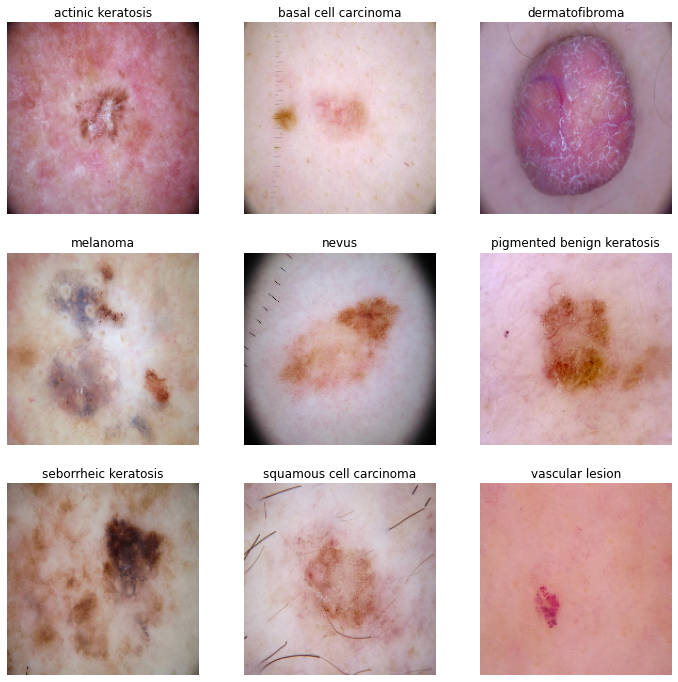

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
AUTOTUNE= tf.data.experimental.AUTOTUNE
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
validation_ds= validation_ds.cache().prefetch(buffer_size= AUTOTUNE)

Creating the model

In [11]:
num_classes=len(class_names)
model= Sequential([
                   layers.experimental.preprocessing.Rescaling(
                       1./255, input_shape=(img_height, img_width, 3)),
                   layers.Conv2D(32,3, padding='same', activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3, padding='same', activation= 'relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3, padding='same', activation= 'relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(128, 3, padding='same', activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.25),
                   layers.Flatten(),
                   layers.Dense(128, activation= 'relu'),
                   layers.Dense(64, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(num_classes)
])

In [12]:
#Compiling the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        3

### Model Training

In [14]:
history= model.fit(train_ds,
                   validation_data= validation_ds,
                   epochs= 30)

Epoch 1/30
28/28 [==============================] - 29s 267ms/step - loss: 2.0853 - accuracy: 0.1836 - val_loss: 2.0250 - val_accuracy: 0.1924
Epoch 2/30
28/28 [==============================] - 4s 134ms/step - loss: 1.9775 - accuracy: 0.2388 - val_loss: 1.9205 - val_accuracy: 0.2662
Epoch 3/30
28/28 [==============================] - 4s 130ms/step - loss: 1.9218 - accuracy: 0.2812 - val_loss: 1.8623 - val_accuracy: 0.3154
Epoch 4/30
28/28 [==============================] - 4s 130ms/step - loss: 1.7720 - accuracy: 0.3672 - val_loss: 1.6384 - val_accuracy: 0.4362
Epoch 5/30
28/28 [==============================] - 4s 130ms/step - loss: 1.7091 - accuracy: 0.3906 - val_loss: 1.5982 - val_accuracy: 0.4206
Epoch 6/30
28/28 [==============================] - 4s 142ms/step - loss: 1.6205 - accuracy: 0.4001 - val_loss: 1.5801 - val_accuracy: 0.4586
Epoch 7/30
28/28 [==============================] - 4s 130ms/step - loss: 1.5348 - accuracy: 0.4515 - val_loss: 1.6938 - val_accuracy: 0.4295
Epoch

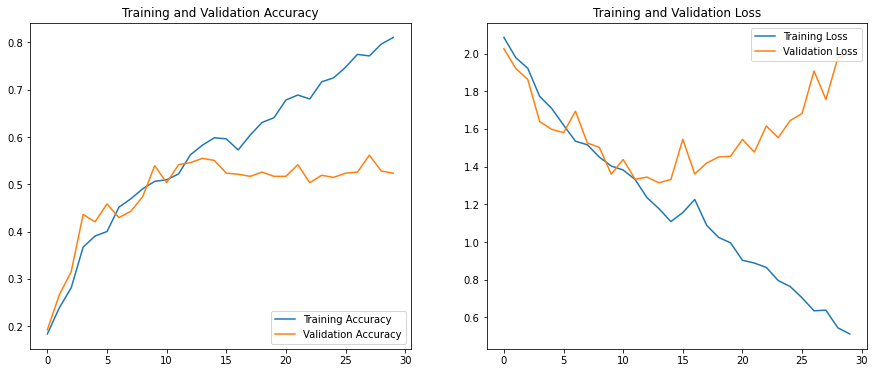

In [17]:
epochs= 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model is highly OVERFITTING!!

Visualizing the label distribution

In [18]:
from glob import glob
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
len(lesion_list)

2239

In [19]:
len(set(lesion_list))

9

In [20]:
label_dict={}
for i in class_names:
  label_dict[i]= lesion_list.count(i)

print(label_dict)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [21]:
label_df= pd.DataFrame(label_dict.items(), columns= ['class_name', 'count'])
label_df

,class_name,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


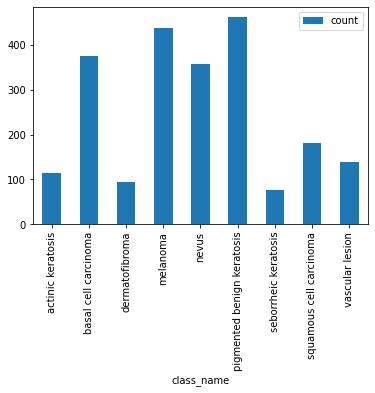

In [22]:
label_df.plot.bar(x= 'class_name', y='count')

In [23]:
label_df['%age']= round((label_df['count']/2239)*100, 2)
label_df.sort_values(by= '%age', ascending=False)

,class_name,count,%age
5,pigmented benign keratosis,462,20.63
3,melanoma,438,19.56
1,basal cell carcinoma,376,16.79
4,nevus,357,15.94
7,squamous cell carcinoma,181,8.08
8,vascular lesion,139,6.21
0,actinic keratosis,114,5.09
2,dermatofibroma,95,4.24
6,seborrheic keratosis,77,3.44


Highly imbalance data, also images for some categories are too less for training

In [24]:
!pip install Augmentor

In [25]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(600) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7818E8AB90>: 100%|██████████| 600/600 [00:28<00:00, 20.85 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F781A2F2C10>: 100%|██████████| 600/600 [00:25<00:00, 23.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F781A2F2A90>: 100%|██████████| 600/600 [00:22<00:00, 26.27 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F781A16BC10>: 100%|██████████| 600/600 [02:05<00:00,  4.79 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F7818612C50>: 100%|██████████| 600/600 [01:57<00:00,  5.12 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F781A1D3A90>: 100%|██████████| 600/600 [00:23<00:00, 25.50 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7818F3FD10>: 100%|██████████| 600/600 [00:55<00:00, 10.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7818E77DD0>: 100%|██████████| 600/600 [00:23<00:00, 25.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7818E77290>: 100%|██████████| 600/600 [00:23<00:00, 25.94 Samples/s]


In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5400


### Training the model after Augmentor

In [27]:
Batch_size= 64
img_height= 180
img_width=180

In [28]:
train_ds_new= tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                  seed=123,
                                                                  subset='training',
                                                                  batch_size= Batch_size,
                                                                  image_size= (img_height, img_width),
                                                                  validation_split=0.2,
                                                                  )

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


In [29]:
validation_ds_new= tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                       seed=123,
                                                                       subset='validation',
                                                                       batch_size= Batch_size,
                                                                       image_size= (img_height, img_width),
                                                                       validation_split=0.2)

Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


In [30]:
num_classes=len(class_names)
model_new= Sequential([
                   layers.experimental.preprocessing.Rescaling(
                       1./255, input_shape=(img_height, img_width, 3)),
                   layers.Conv2D(32,3, padding='same', activation='relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3, padding='same', activation= 'relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(64,3, padding='same', activation= 'relu'),
                   layers.MaxPool2D(),
                   layers.Conv2D(128, 3, padding='same', activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.25),
                   layers.Flatten(),
                   layers.Dense(128, activation= 'relu'),
                   layers.Dense(64, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(num_classes)
])

In [31]:
model_new.compile(optimizer= 'adam',
                  loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [32]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

In [33]:
epochs=30
history1= model_new.fit(train_ds_new,
              validation_data= validation_ds_new,
              epochs=epochs)

Epoch 1/30
96/96 [==============================] - 36s 353ms/step - loss: 1.8455 - accuracy: 0.2816 - val_loss: 1.5693 - val_accuracy: 0.3785
Epoch 2/30
96/96 [==============================] - 34s 334ms/step - loss: 1.5306 - accuracy: 0.3959 - val_loss: 1.4231 - val_accuracy: 0.4368
Epoch 3/30
96/96 [==============================] - 34s 336ms/step - loss: 1.4091 - accuracy: 0.4534 - val_loss: 1.3642 - val_accuracy: 0.4637
Epoch 4/30
96/96 [==============================] - 34s 337ms/step - loss: 1.2842 - accuracy: 0.4998 - val_loss: 1.2663 - val_accuracy: 0.5049
Epoch 5/30
96/96 [==============================] - 34s 336ms/step - loss: 1.1516 - accuracy: 0.5586 - val_loss: 1.1084 - val_accuracy: 0.5691
Epoch 6/30
96/96 [==============================] - 34s 336ms/step - loss: 1.0437 - accuracy: 0.6024 - val_loss: 1.1186 - val_accuracy: 0.5678
Epoch 7/30
96/96 [==============================] - 34s 336ms/step - loss: 0.8998 - accuracy: 0.6574 - val_loss: 1.0293 - val_accuracy: 0.6045

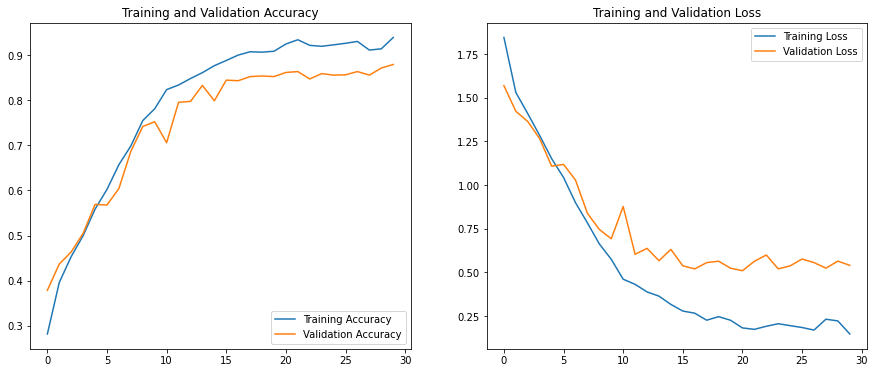

In [35]:
epochs= 30
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model is a good model with training accuracy of 93.95 % and validation accuracy of 87.95%.
